# Explore

### Imports

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from acquire import wrangle_store_data

import warnings
warnings.filterwarnings('ignore')
import prepare as p

ModuleNotFoundError: No module named 'figure'

# Store Item Demand

#### • Load your store item demand data using your acquire and/or prepare functions.

In [30]:
df = wrangle_store_data()
df.head(3)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [31]:
df = p.datetime_type(df,'sale_date')


In [32]:
df = p.set_date_to_index(df,'sale_date')

In [33]:
df = p.multiply_columns_addto_df(df,'sales_total' ,'item_price','sale_amount')

In [34]:
# add month name and day and year name to columns
df = p.add_date_column_string(df,'month_name', string='%B')
df = p.add_date_column_string(df,'day_name','%A')
df = p.add_date_column_string(df,'year','%Y')

In [28]:
df

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,sales_total,month_name,day_name,year_name,year
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,10.92,January,Tuesday,2013,2013
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,30.16,January,Tuesday,2013,2013
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,308.48,January,Tuesday,2013,2013
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,197.55,January,Tuesday,2013,2013
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,25.16,January,Tuesday,2013,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,7,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,706662,31,12018 Perrin Beitel Rd,78217,San Antonio,TX,279.62,December,Sunday,2017,2017
2017-12-31,7,40,42272008063,42272008063,Amys,Amys Light & Lean Spaghetti Italiano,0.60,724922,22,12018 Perrin Beitel Rd,78217,San Antonio,TX,13.20,December,Sunday,2017,2017
2017-12-31,7,41,31000670016,31000670016,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,743182,19,12018 Perrin Beitel Rd,78217,San Antonio,TX,106.78,December,Sunday,2017,2017


In [40]:
df.index.value_counts().sort_index()

2013-01-01    500
2013-01-02    500
2013-01-03    500
2013-01-04    500
2013-01-05    500
             ... 
2017-12-27    500
2017-12-28    500
2017-12-29    500
2017-12-30    500
2017-12-31    500
Name: sale_date, Length: 1826, dtype: int64

### 1. Using a human-based approach, split your dataset into train and test sets.

In [49]:
# human-based approach
train = df[:'2016'] # includes 2016
test = df['2017']

### 2. Visualize your train-test split.

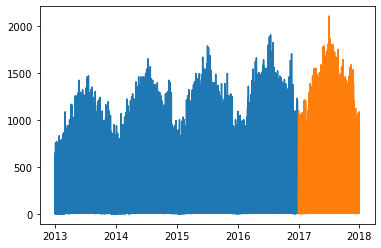

In [44]:
train = df[:'2016'] # includes 2016
test = df['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total);


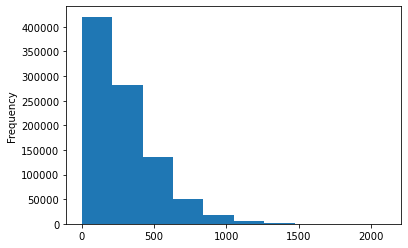

In [47]:
df.sales_total.plot.hist();

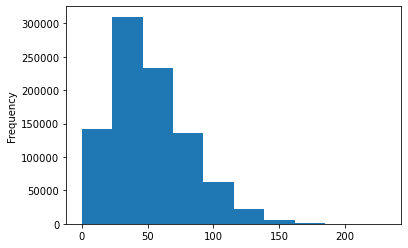

In [48]:
df.sale_amount.plot.hist();

#### • Only use your train data set to perform the following tasks:

### 3. Resample your data and visualize it.

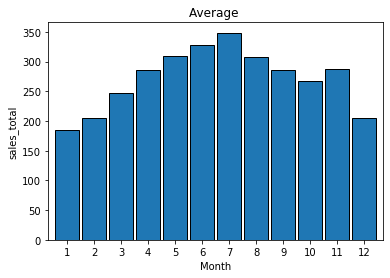

In [64]:
ax = train.groupby(train.index.month).sales_total.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average ', xlabel='Month', ylabel='sales_total');

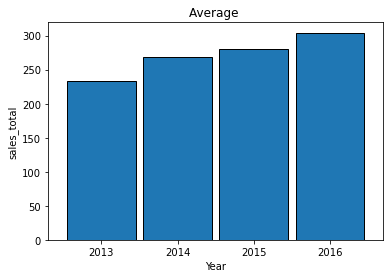

In [65]:
ax = train.groupby(train.index.year).sales_total.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average ', xlabel='Year', ylabel='sales_total');

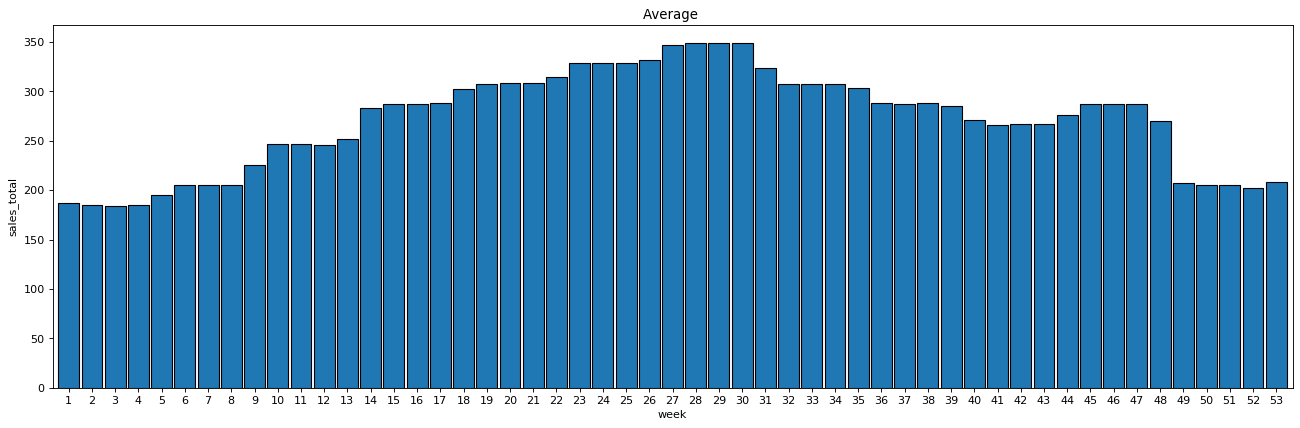

In [66]:
plt.figure(figsize=(20, 6), dpi=80)
ax = train.groupby(train.index.week).sales_total.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average ', xlabel='week', ylabel='sales_total');

<AxesSubplot:xlabel='sale_date'>

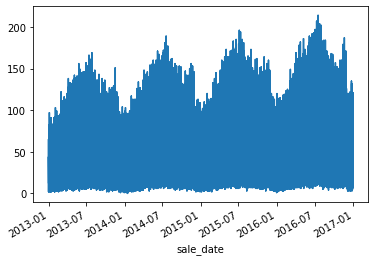

In [70]:
train.sale_amount.plot();

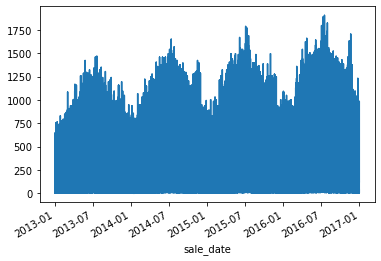

In [71]:
train.sales_total.plot();

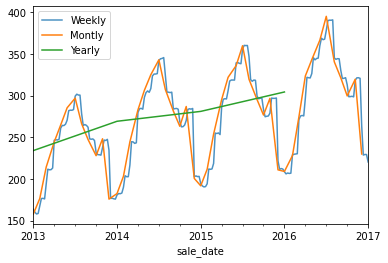

In [76]:
# resample with week , month, year
train.sales_total.resample('W').mean().plot(alpha=.8, label='Weekly')
train.sales_total.resample('M').mean().plot(label='Monthly')
train.sales_total.resample('Y').mean().plot(label='Yearly')
plt.legend()

### 4. Creating a rolling (moving) average of your data and visualize it.

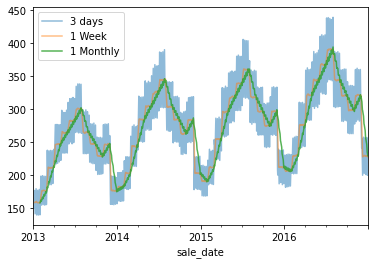

In [83]:
train.sales_total.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 days')
train.sales_total.resample('D').mean().rolling(7).mean().plot(alpha=.5, label='1 Week')
train.sales_total.resample('D').mean().rolling(30).mean().plot(alpha=.8, label='1 Monthly')
#train.sales_total.resample('Y').mean().rolling(7).mean().plot(alpha=.8, label='1 Yearly')
plt.legend()

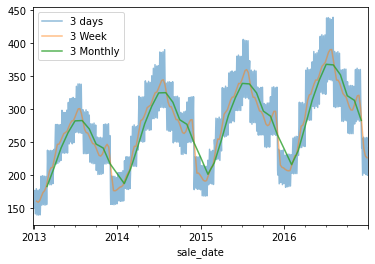

In [85]:
train.sales_total.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 days')
train.sales_total.resample('w').mean().rolling(3).mean().plot(alpha=.5, label='3 Week')
train.sales_total.resample('M').mean().rolling(3).mean().plot(alpha=.8, label='3 Monthly')
#train.sales_total.resample('Y').mean().rolling(7).mean().plot(alpha=.8, label='1 Yearly')
plt.legend();

### 5. Plot the difference in sales from one day to the next.

### 6. Plot the % difference in sales from one day to the next.

### 7. Plot the % difference in sales from one week to the next.

### 8. Plot the % difference in sales from one month to the next.

### 9. Visualize an autocorrelation plot on a weekly resampling.

### 10. Visualize a seasonal decomposition plot on a weekly resampling